# CA2 Rory Sheridan


In [109]:
import seaborn as sns
from colorama import Fore, Style
from pandas import DataFrame, concat


# Question 1

Read in the below information of a company’s transactions for the year2022 into a python dictionary files.


In [110]:
class DataFrameManager:
    """Create dataframes from dictionaries and provide manage options."""

    # a. Convert each database into a dataframe in python.
    def __init__(self, *args: dict[str, list]) -> None:
        """Accept dictionaries and store as attributes."""
        for i, db_dict in enumerate(args):
            data_frame = DataFrame(db_dict)
            setattr(self, f'dict_df_{i + 1}', data_frame)

    def add_col(self, frame: DataFrame, col: str) -> DataFrame:
        """Add a column and generate values for it.

        Args:
            frame (DataFrame): the data frame to alter.
            col (str): the column name to add.

        Returns:
            DataFrame: The altered frame.

        """
        product_category = {
            'Telephone': 'IT',
            'Monitors': 'IT',
            'Car': 'Transport',
            'Rent': 'Consultancy',
            'Services': 'Consultancy',
            'Training': 'Education',
        }

        to_add = [
            product_category.get(value, '') for value in frame['Product']
        ]

        frame[col] = to_add
        return frame

    def calculate_total(self, frame: DataFrame) -> None:
        """Calculate the total sales, cost and profit of products.

        Args:
            frame (DataFrame): The frame to use for calculations.

        Returns:
            _type_: A merged frame of the old with the total columns.

        """
        totals_frame = (
            frame.select_dtypes(include=['number']).sum().to_frame().T
        )

        totals_frame.insert(0, 'TR_ID', 'Total')
        totals_frame.insert(1, 'Product', '-----')

        return concat([frame, totals_frame], ignore_index=True)

    def create_finance_frame(self, frame: DataFrame) -> DataFrame:
        """Create a new DataFrame with financial statistics.

        Args:
            frame (DataFrame): The dataframe containing the information.

        Returns:
            DataFrame: New dataframe with financial details.

        """
        finance_frame = {'TR_ID': frame['TR_ID'], 'Product': frame['Product']}
        revenue = []
        cost = []
        profit = []
        for _index, row in frame.iterrows():
            product_revenue = row['Quantity'] * row['Sale_price']
            if product_revenue > 55000:
                product_revenue *= 0.95
            elif 35000 < product_revenue <= 55000:
                product_revenue *= 0.98
            else:
                product_revenue *= 0.99

            revenue.append(product_revenue)
            product_cost = row['Quantity'] * row['Purchase_price']
            cost.append(product_cost)
            profit.append(product_revenue - product_cost)
        finance_frame['Revenue'] = revenue
        finance_frame['Cost'] = cost
        finance_frame['Profit'] = profit
        return DataFrame(finance_frame)

    # b. Note that the databases and the corresponding column names with
    # spelling differences. Correct this to have all column names without 's'
    def clean_headings(self) -> None:
        """Remove the final s from the dataframe column names."""
        for value in vars(self).values():
            new_columns = [col.removesuffix('s') for col in value.columns]
            value.columns = new_columns

    def clean_number(self, frame: DataFrame, num_cols: list[str]) -> None:
        """Check for strings in number column, replace with mean.

        Args:
            frame (DataFrame): The data frame to clean.
            num_cols (list[str]): The names of the columns to clean.

        """
        for col in num_cols:
            num_vals = [
                val if isinstance(val, (int, float)) else 0
                for val in frame[col]
            ]
            mean = sum(num_vals) / len(num_vals)
            for i in range(len(num_vals)):
                if num_vals[i] == 0:
                    num_vals[i] = round(mean)
            frame[col] = num_vals

    def delete_col(self, frame: DataFrame, col: str) -> DataFrame:
        """Delete a column from a frame.

        Args:
            frame (DataFrame): The frame to alter.
            col (str): The column to delete.

        Returns:
            _type_: The altered data frame.

        """
        frame.drop(col, axis=1, inplace=True)

    def evaluation_message(self, number: int) -> None:
        """Respond with a message based on value.

        Args:
            number (int): the number to evaluate.

        """
        if number > 0:
            print(
                Fore.GREEN
                + "The business is on it's way to success!"
                + Style.RESET_ALL,
            )
        if number == 0:
            print(
                Fore.YELLOW
                + 'Just breaking even. Hang in there!'
                + Style.RESET_ALL,
            )
        if number < 0:
            print(Fore.RED + 'Time to revise your finances.' + Style.RESET_ALL)

    def join_dataframes(self, attr_name: str) -> DataFrame:
        """Merge dataframes into a single table based on columns.

        Args:
            attr_name (str): The name for the new attribute.

        Returns:
            DataFrame: Single dataframe.

        """
        try:
            frame_list = list(vars(self).values())
            merged_df = frame_list[0]
            for df in frame_list[1:]:
                matching_cols = [
                    col for col in df.columns if col in merged_df.columns
                ]
                merged_df = merged_df.merge(df, on=matching_cols, how='outer')
        except ValueError as e:
            print(
                'There is an issue with the dataset merging.'
                f' Please check they have shared column: {e}',
            )
        else:
            setattr(self, attr_name, merged_df)
            return merged_df

In [111]:
# Declare data.
dbase1_dict = {
    'TR_ID': [
        'C23',
        'C24',
        'C25',
        'C26',
        'C27',
        'C28',
    ],
    'Product': [
        'Telephone',
        'Monitors',
        'Car',
        'Rent',
        'Services',
        'Training',
    ],
    'Quantitys': [
        420,
        'Ten',
        234,
        114,
        56,
        13,
    ],
    'Purchase_prices': [
        223,
        344,
        223,
        'Tenn',
        'Two',
        223,
    ],
}
dbase2_dict = {
    'TR_ID': [
        'C23',
        'C24',
        'C25',
        'C26',
        'C27',
        'C28',
    ],
    'Products': [
        'Telephone',
        'Monitors',
        'Car',
        'Rent',
        'Services',
        'Training',
    ],
    'Sale_price': [
        300,
        435,
        329,
        544,
        'thirty',
        329,
    ],
    'Debit': [
        2,
        2,
        2,
        2,
        2,
        2,
    ],
}

dbase3_dict = {
    'TR_ID': ['C28'],
    'Product': ['Training'],
    'Quantity': [13],
    'Purchase_price': [223],
    'Sale_price': [329],
}

## a. Convert each database into a dataframe in python.


In [112]:
# Accepts dictionaries and stores the data frames as attributes.
dict_df_db = DataFrameManager(dbase1_dict, dbase2_dict, dbase3_dict)

dict_df_db.dict_df_1

,TR_ID,Product,Quantitys,Purchase_prices
0,C23,Telephone,420,223
1,C24,Monitors,Ten,344
2,C25,Car,234,223
3,C26,Rent,114,Tenn
4,C27,Services,56,Two
5,C28,Training,13,223


In [113]:
dict_df_db.dict_df_2

,TR_ID,Products,Sale_price,Debit
0,C23,Telephone,300,2
1,C24,Monitors,435,2
2,C25,Car,329,2
3,C26,Rent,544,2
4,C27,Services,thirty,2
5,C28,Training,329,2


In [114]:
dict_df_db.dict_df_3

,TR_ID,Product,Quantity,Purchase_price,Sale_price
0,C28,Training,13,223,329


## b. Note that the databases and the corresponding column names with spelling differences. Correct this to have all column names without ‘s’


In [115]:
dict_df_db.clean_headings()
dict_df_db.dict_df_1

,TR_ID,Product,Quantity,Purchase_price
0,C23,Telephone,420,223
1,C24,Monitors,Ten,344
2,C25,Car,234,223
3,C26,Rent,114,Tenn
4,C27,Services,56,Two
5,C28,Training,13,223


## c. Combine the above three databases into one single dataframe called ‘dbase4’ in python using the appropriate method and libraries.


In [116]:
dict_df_db.join_dataframes('dbase4')
dict_df_db.dbase4

,TR_ID,Product,Quantity,Purchase_price,Sale_price,Debit
0,C23,Telephone,420,223,300,2
1,C24,Monitors,Ten,344,435,2
2,C25,Car,234,223,329,2
3,C26,Rent,114,Tenn,544,2
4,C27,Services,56,Two,thirty,2
5,C28,Training,13,223,329,2


## d. Consider the character values as error, remove these errors and replace with column’s mean.


In [117]:
dict_df_db.clean_number(
    dict_df_db.dbase4,
    ['Quantity', 'Purchase_price', 'Sale_price'],
)
dict_df_db.dbase4

,TR_ID,Product,Quantity,Purchase_price,Sale_price,Debit
0,C23,Telephone,420,223,300,2
1,C24,Monitors,140,344,435,2
2,C25,Car,234,223,329,2
3,C26,Rent,114,169,544,2
4,C27,Services,56,169,323,2
5,C28,Training,13,223,329,2


## e. Delete the variable ‘Debit’ as not needed then add a column called‘Department’ and assign values from product column: Telphone, monitor -> IT, Car -> transport Rent, Services-> Consultancy Training -> Education


In [118]:
dict_df_db.delete_col(dict_df_db.dbase4, 'Debit')
dict_df_db.dbase4

,TR_ID,Product,Quantity,Purchase_price,Sale_price
0,C23,Telephone,420,223,300
1,C24,Monitors,140,344,435
2,C25,Car,234,223,329
3,C26,Rent,114,169,544
4,C27,Services,56,169,323
5,C28,Training,13,223,329


In [119]:
dict_df_db.add_col(dict_df_db.dbase4, 'Department')
dict_df_db.dbase4

,TR_ID,Product,Quantity,Purchase_price,Sale_price,Department
0,C23,Telephone,420,223,300,IT
1,C24,Monitors,140,344,435,IT
2,C25,Car,234,223,329,Transport
3,C26,Rent,114,169,544,Consultancy
4,C27,Services,56,169,323,Consultancy
5,C28,Training,13,223,329,Education


## f. Visualise the data by creating the plot: product by sale and purchase prices on the same plot.


<Axes: xlabel='Purchase_price', ylabel='Sale_price'>

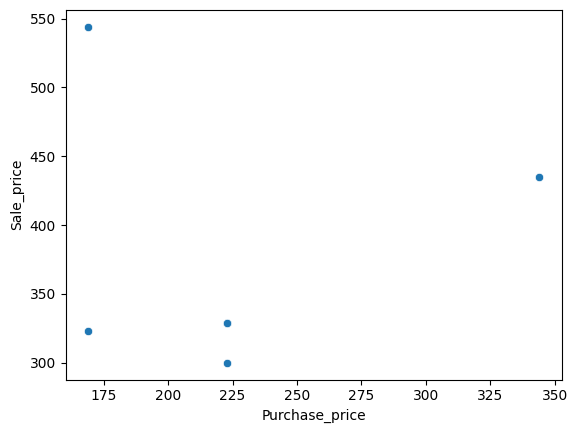

In [120]:
sns.scatterplot(data=dict_df_db.dbase4, x='Purchase_price', y='Sale_price')

## g. After creating the single dataframe: Using DataFrame and Class or other method with the above corrected values: Calculate:

Revenue = Quantity*Sale_price
Cost= quantity*purchase_price
Note if revenue > $55000 then a cashback of 5% is given so revenue is less by the 5% amount
If revenue > $35000 and <= $550000 then cashback of %2 is given and revenue less the 2% amount But If revenue <=35000 then cashback of 1% amount is given
The calculated total cost and total revenue Profit= total revenue – total cost. Report the TR_ID, product name, total revenue , total cost and profit.Check if final profit> 0 then print a message. If final profit = 0 then print a message If final profit < 0 then print a message


In [121]:
dbase4_finances = dict_df_db.create_finance_frame(dict_df_db.dbase4)
dbase4_finances.style.format({'Revenue': '{:.2f}', 'Profit': '{:.2f}'})

,TR_ID,Product,Revenue,Cost,Profit
0,C23,Telephone,119700.00,93660,26040.00
1,C24,Monitors,57855.00,48160,9695.00
2,C25,Car,73136.70,52182,20954.70
3,C26,Rent,58915.20,19266,39649.20
4,C27,Services,17907.12,9464,8443.12
5,C28,Training,4234.23,2899,1335.23


In [122]:
totals_dict = dict_df_db.calculate_total(dbase4_finances)
totals_dict.style.format(
    {'Revenue': '{:.2f}', 'Cost': '{:.2f}', 'Profit': '{:.2f}'},
)

,TR_ID,Product,Revenue,Cost,Profit
0,C23,Telephone,119700.00,93660.00,26040.00
1,C24,Monitors,57855.00,48160.00,9695.00
2,C25,Car,73136.70,52182.00,20954.70
3,C26,Rent,58915.20,19266.00,39649.20
4,C27,Services,17907.12,9464.00,8443.12
5,C28,Training,4234.23,2899.00,1335.23
6,Total,-----,331748.25,225631.00,106117.25


In [123]:
dict_df_db.evaluation_message(totals_dict['Profit'].iloc[-1])

The business is on it's way to success!


# Question 2. Stock Transaction Program

Tom purchased some stock in DBS Software.

Here are the details:

1. The number of shares that Tom purchased was 5,000
2. When Tom purchased the stock, he paid €40.0 per share.
3. Tom paid his stockbroker a commission that amounted to 3% of the amount he paid for the stock.

Two weeks later, Tom sold the stock. Here are the details:

1. The number of shares that Tom sold was 2,000
2. When Tom sold the stock , he sold for €42.75 per share.
3. Tom paid his stockbroker another commission that amounted to 3% of the amount he received for the stock.

Write a program that displays the following information.

1. The amount of money Tom paid for the stock
2. The amount of commission Tom paid his broker when he bought the stock.
3. The amount for which Tom sold the stock
4. The amount of commission Tom paid his broker when he sold the stock.
5. Display the amount of money that Tom had left when he sold the stock and paid his broker(both times). If this amount is positive, then Tom made a profit. If the amount is negative, then Tom lost money.

In [134]:
class StockCalculator:
    def __init__(self, stock: dict[str, int | float]) -> None:
        for key, value in stock.items():
            setattr(self, key, value)

    def calculate_purchase_cost(self) -> float:
        return self.buy_shares * self.buy_price

    def calculate_commission(self, cost: float) -> float:
        return cost * self.commission_percent / 100

    def calculate_sale_total(self) -> float:
        return self.sell_shares * self.sell_price

    def calculate_into_frame(self) -> DataFrame:
        purchase_cost = self.calculate_purchase_cost()
        purchase_commission = self.calculate_commission(purchase_cost)
        sale_total = self.calculate_sale_total()
        sale_commission = self.calculate_commission(sale_total)

        total_money = sale_total - purchase_commission - sale_commission
        net_profit = total_money - purchase_cost

        stat_dict = {
            'Purchase Cost': [purchase_cost],
            'Purchase Commission': [purchase_commission],
            'Sale Total': [sale_total],
            'Sale Commission': [sale_commission],
            'Total Money': [total_money],
            'Net Profit': [net_profit]
        }

        return DataFrame(stat_dict)

In [135]:
toms_trade = {
    'buy_shares': 5000,
    'sell_shares': 2000,
    'buy_price': 40.0,
    'sell_price': 42.75,
    'commission_percent': 3,
}

toms_calculator = StockCalculator(toms_trade)


In [136]:
stat_frame = toms_calculator.calculate_into_frame()
stat_frame.style.format(dict.fromkeys(stat_frame.columns, '{:.2f}'))

,Purchase Cost,Purchase Commission,Sale Total,Sale Commission,Total Money,Net Profit
0,200000.00,6000.00,85500.00,2565.00,76935.00,-123065.00
